<a href="https://colab.research.google.com/github/pw0908/Caltech-CS155-2022/blob/main/sets/set2/set2_prob2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [164]:
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [2]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [209]:
def loss(X, Y, w, l):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    return -np.sum(np.log(1/(1+np.exp(-Y*np.dot(X,w)))))

def gradient(x, y, w, l):
    '''
    Calculate the gradient of the loss function with respect to the weight vector w,
    evaluated at a single point (x, y) and weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to w. 
    '''

    return -y*x/(1+np.exp(y*np.dot(w,x)))+2*l*w

def SGD(data, w0, l, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        W: A (N_epochs, D) shaped array containing the weight vectors from all iterations.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    w = w0
    N = np.size(data,axis=0)

    means = np.mean(data[:,1:14],axis=0)
    stds  = np.std(data[:,1:14],axis=0)
    data[:,1:14] = np.subtract(data[:,1:14],means)/stds
    data = np.concatenate((data,np.ones((N,1))),axis=1)
    for i in range(N_epochs):
        np.random.shuffle(data)
        X = data[:,1:15]
        Y = data[:,0]
        for j in range(len(Y)):
            grad = gradient(X[j],Y[j],w,l/N)
            w -= grad*eta
    losses = loss(X,Y,w,l)
    w[0:13] = w[0:13]/stds

    w[13] = w[13]-np.sum(means*w[0:13])
    return w, losses/N

In [211]:
data_train1 = load_data("data/wine_training1.txt")
data_train2 = load_data("data/wine_training2.txt")
data_val   = load_data("data/wine_validation.txt")
w0 = np.random.rand(14)
l = [5**i*1e-5 for i in range(15)]
Ein1 = []
Eout1 = []
l2norm1 = []
Ein2 = []
Eout2 = []
l2norm2 = []
for i in l:
    # i = l[0]
    w0 = np.random.rand(14)
    data = copy.copy(data_train1)
    w, losses = SGD(data,w0,i,5e-4,20000)
    Ein1 = np.append(Ein1,losses)
    Eout1 = np.append(Eout1,loss(np.concatenate((data_val[:,1:14],np.ones((30,1))),axis=1),data_val[:,0],w,i)/30)
    l2norm1 = np.append(l2norm1,np.sqrt(np.dot(w,w)))

    w0 = np.random.rand(14)
    data = copy.copy(data_train2)
    w, losses = SGD(data,w0,i,5e-4,20000)
    Ein2 = np.append(Ein2,losses)
    Eout2 = np.append(Eout2,loss(np.concatenate((data_val[:,1:14],np.ones((30,1))),axis=1),data_val[:,0],w,i)/30)
    l2norm2 = np.append(l2norm2,np.sqrt(np.dot(w,w)))

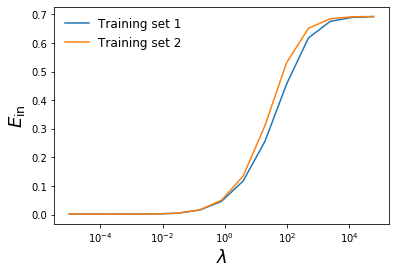

In [215]:
plt.semilogx(l,Ein1,label="Training set 1")
plt.semilogx(l,Ein2,label="Training set 2")
plt.xlabel("$\lambda$",fontsize=18)
plt.ylabel("$E_{\mathrm{in}}$",fontsize=18)
plt.legend(loc = 'best', fontsize = 12,frameon=False)
plt.savefig("E_in_2.pdf")

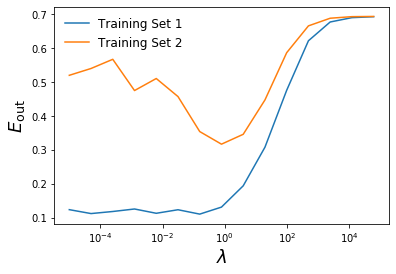

In [216]:
plt.semilogx(l,Eout1,label="Training Set 1")
plt.semilogx(l,Eout2,label="Training Set 2")
plt.xlabel("$\lambda$",fontsize=18)
plt.ylabel("$E_{\mathrm{out}}$",fontsize=18)
plt.legend(loc = 'best', fontsize = 12,frameon=False)
plt.savefig("E_out_2.pdf")

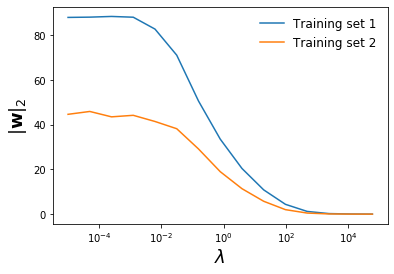

In [217]:
plt.semilogx(l,l2norm1,label="Training set 1")
plt.semilogx(l,l2norm2,label="Training set 2")
plt.xlabel("$\lambda$",fontsize=18)
plt.ylabel("$\|\mathbf{w}\|_2$",fontsize=18)
plt.legend(loc = 'best', fontsize = 12,frameon=False)
plt.savefig("l2norm_2.pdf")